# Food Demand Project : Team E

## Topic: Tanzania

## Goals:

## Table of Contents: 
* [(A) Choice of a population, with supporting expenditure data](#population)
* [(B) Nutritional content of different foods](#nutrition)
* [(B) Nutritional adequacy of diet](#adequacy)
* [(A) Estimate Demand System](#demand)
* [(C) Counterfactual Experiments](#counterfactual)
* [(A) Presentation](#presentation)

### Setup

In [1]:
!pip install -r requirements.txt

## (A) Choice of a population, with supporting expenditure data <a class="anchor" id="population"></a>

In [2]:
Tanzania_Nutrient_Data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Tanzania_Consumption_Data = '1eRq1SbS5xTBkTzpjxLQLAKQ-j4o5UVp4mhHZSsn8K0M'
Tanzania_Family_Data = '1POplhyd44h-Zt8jMhXa2FGAzS051TPoLa2xMlmvVLU0'
Tanzania_RuralUrban_Data = '1elpi1hGwp29UZzCd6024KyhSIay2VKFg8j0qCC_jH5U'
Tanzania_ProcessedFood_Data = '1UaFXpfQsB-VDq4MSVt2e9WoAXqc7Rmam_-u8dvcfleo'

In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

# Pull Tazania Expenditures from Sheets
x = read_sheets(Tanzania_Family_Data,sheet='Expenditures')
x = x[x['m'] != 'Nan'] #Remove rows with no location
x = x.astype({'i':'int64'}) 

# Pull Tazania Household Info from Sheets & Clean
t_map = {1: '2008-09', 2:'2010-11', 3: '2012-13', 4:'2014-15'} # Use to match round to year structure of Expenditures


# Reformat Expedentures databases to match structure
x = x.pivot_table(values='value_purchase', index=['i','t','m'], columns=['j'], aggfunc='first')
x = x.replace(0,np.nan) # Replace zeros with missing
x = x.reset_index(level=['m'])
x

Key available for students@eep153.iam.gserviceaccount.com.


j                           m     Beef  Bottled beer  Bread  Butter  \
i     t                                                               
1     2008-09  Mainland Rural   2500.0           NaN    NaN     NaN   
      2010-11  Mainland Rural      NaN           NaN    NaN     NaN   
      2012-13  Mainland Rural   2000.0           NaN    NaN     NaN   
      2014-15  Mainland Rural      NaN           NaN    NaN     NaN   
      2019-20  Mainland Rural   2500.0           NaN    NaN     NaN   
...                       ...      ...           ...    ...     ...   
14981 2014-15  Mainland Rural  10000.0           NaN    NaN     NaN   
14983 2014-15  Mainland Rural  10000.0           NaN    NaN     NaN   
      2020-21  Mainland Rural      NaN           NaN    NaN     NaN   
14984 2014-15  Mainland Rural   1000.0           NaN    NaN     NaN   
14985 2014-15  Mainland Rural   5000.0           NaN    NaN     NaN   

j              Canned milk/milk powder  Canned, dried and wild vegetables  \
i     t                                                                     
1     2008-09                      NaN                                NaN   
      2010-11                      NaN                                NaN   
      2012-13                      NaN                                NaN   
      2014-15                      NaN                                NaN   
      2019-20                      NaN                                NaN   
...                                ...                                ...   
14981 2014-15                      NaN                                NaN   
14983 2014-15                      NaN                                NaN   
      2020-21                      NaN                                NaN   
14984 2014-15                      NaN                                NaN   
14985 2014-15                      NaN                                NaN   

j              Cassava dry/flour  Cassava fresh  Chicken  ...  \
i     t                                                   ...   
1     2008-09                NaN            NaN      NaN  ...   
      2010-11                NaN            NaN      NaN  ...   
      2012-13                NaN            NaN      NaN  ...   
      2014-15                NaN            NaN      NaN  ...   
      2019-20                NaN            NaN      NaN  ...   
...                          ...            ...      ...  ...   
14981 2014-15                NaN            NaN      NaN  ...   
14983 2014-15                NaN            NaN      NaN  ...   
      2020-21                NaN            NaN      NaN  ...   
14984 2014-15                NaN            NaN      NaN  ...   
14985 2014-15                NaN            NaN      NaN  ...   

j              Wheat, barley, other grains  Wild birds and insects  \
i     t                                                              
1     2008-09                          NaN                     NaN   
      2010-11                          NaN                     NaN   
      2012-13                          NaN                     NaN   
      2014-15                          NaN                     NaN   
      2019-20                          NaN                     NaN   
...                                    ...                     ...   
14981 2014-15                          NaN                     NaN   
14983 2014-15                          NaN                     NaN   
      2020-21                          NaN                     NaN   
14984 2014-15                          NaN                     NaN   
14985 2014-15                          NaN                     NaN   

j              Wine and spirits  Yams/cocoyams  bread  eggs   salt  sugar  \
i     t                                                                     
1     2008-09               NaN            NaN    NaN   NaN    NaN    NaN   
      2010-11               NaN            NaN    NaN   NaN    NaN    NaN   
      201

In [4]:
# Pull additional processed food expenditures
x_processed = read_sheets(Tanzania_ProcessedFood_Data,sheet='upd4_hh_f.dta') 
x_processed = x_processed.replace({"round": t_map}) # Apply mapping
x_processed = x_processed.rename(columns={'round':'t'})
x_processed = x_processed.set_index(['i','t'])
x_processed.columns.name = 'j'
x_processed

Key available for students@eep153.iam.gserviceaccount.com.


j              Barbequed meat, chips, roast bananas  kibuku, local brews  \
i     t                                                                    
1     2008-09                                   NaN                  NaN   
      2010-11                                   NaN                  NaN   
      2012-13                                   NaN                  NaN   
      2014-15                                   NaN                  NaN   
2     2008-09                                   NaN                  NaN   
...                                             ...                  ...   
45392 2014-15                                   NaN                  NaN   
45393 2014-15                                   NaN                  NaN   
45394 2014-15                                   NaN                  NaN   
45395 2014-15                                   NaN                  NaN   
45396 2014-15                                   NaN                  NaN   

j              wine, commercial beer, spirits  \
i     t                                         
1     2008-09                             NaN   
      2010-11                             NaN   
      2012-13                             NaN   
      2014-15                             NaN   
2     2008-09                             NaN   
...                                       ...   
45392 2014-15                             NaN   
45393 2014-15                             NaN   
45394 2014-15                             NaN   
45395 2014-15                             NaN   
45396 2014-15                             NaN   

j              sodas and other non-alcoholic drinks  sweets, ice cream  \
i     t                                                                  
1     2008-09                                   NaN                NaN   
      2010-11                                   NaN                NaN   
      2012-13                                   NaN                NaN   
      2014-15                                   NaN                NaN   
2     2008-09                                   NaN                NaN   
...                                             ...                ...   
45392 2014-15                                   NaN                NaN   
45393 2014-15                                   NaN                NaN   
45394 2014-15                                   NaN                NaN   
45395 2014-15                                   NaN                NaN   
45396 2014-15                                   NaN                NaN   

j              tea, coffee, samosa, cake  
i     t                                   
1     2008-09                        NaN  
      2010-11                        NaN  
      2012-13                        NaN  
      2014-15                        NaN  
2     2008-09                        NaN  
...                                  ...  
45392 2014-15                        NaN  
45393 2014-15                        NaN  
45394 2014-15                        NaN  
45395 2014-15                        NaN  
45396 2014-15                        NaN  

[83706 rows x 6 columns]

In [5]:
# Merge Processed Food Expenditures
x = pd.merge(x, x_processed, on=['i','t'], how="left")
x = x.reset_index().set_index(['i','t','m'])
x

j                                Beef  Bottled beer  Bread  Butter  \
i     t       m                                                      
1     2008-09 Mainland Rural   2500.0           NaN    NaN     NaN   
      2010-11 Mainland Rural      NaN           NaN    NaN     NaN   
      2012-13 Mainland Rural   2000.0           NaN    NaN     NaN   
      2014-15 Mainland Rural      NaN           NaN    NaN     NaN   
      2019-20 Mainland Rural   2500.0           NaN    NaN     NaN   
...                               ...           ...    ...     ...   
14981 2014-15 Mainland Rural  10000.0           NaN    NaN     NaN   
14983 2014-15 Mainland Rural  10000.0           NaN    NaN     NaN   
      2020-21 Mainland Rural      NaN           NaN    NaN     NaN   
14984 2014-15 Mainland Rural   1000.0           NaN    NaN     NaN   
14985 2014-15 Mainland Rural   5000.0           NaN    NaN     NaN   

j                             Canned milk/milk powder  \
i     t       m                                         
1     2008-09 Mainland Rural                      NaN   
      2010-11 Mainland Rural                      NaN   
      2012-13 Mainland Rural                      NaN   
      2014-15 Mainland Rural                      NaN   
      2019-20 Mainland Rural                      NaN   
...                                               ...   
14981 2014-15 Mainland Rural                      NaN   
14983 2014-15 Mainland Rural                      NaN   
      2020-21 Mainland Rural                      NaN   
14984 2014-15 Mainland Rural                      NaN   
14985 2014-15 Mainland Rural                      NaN   

j                             Canned, dried and wild vegetables  \
i     t       m                                                   
1     2008-09 Mainland Rural                                NaN   
      2010-11 Mainland Rural                                NaN   
      2012-13 Mainland Rural                                NaN   
      2014-15 Mainland Rural                                NaN   
      2019-20 Mainland Rural                                NaN   
...                                                         ...   
14981 2014-15 Mainland Rural                                NaN   
14983 2014-15 Mainland Rural                                NaN   
      2020-21 Mainland Rural                                NaN   
14984 2014-15 Mainland Rural                                NaN   
14985 2014-15 Mainland Rural                                NaN   

j                             Cassava dry/flour  Cassava fresh  Chicken  \
i     t       m                                                           
1     2008-09 Mainland Rural                NaN            NaN      NaN   
      2010-11 Mainland Rural                NaN            NaN      NaN   
      2012-13 Mainland Rural                NaN            NaN      NaN   
      2014-15 Mainland Rural                NaN            NaN      NaN   
      2019-20 Mainland Rural                NaN            NaN      NaN   
...                                         ...            ...      ...   
14981 2014-15 Mainland Rural                NaN            NaN      NaN   
14983 2014-15 Mainland Rural                NaN            NaN      NaN   
      2020-21 Mainland Rural                NaN            NaN      NaN   
14984 2014-15 Mainland Rural                NaN            NaN      NaN   
14985 2014-15 Mainland Rural                NaN            NaN      NaN   

j                             Citrus fruits  ...   salt  sugar  sugarcane  \
i     t       m                              ...                            
1     2008-09 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2010-11 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2012-13 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2014-15 Mainland Rural            NaN  ...    NaN    NaN        NaN   
      2019-20 Mainland Rural         

In [6]:
# Take logs of expenditures; call this y
y = np.log(x)

# Change 'Tanzania' to key of your own sheet in Sheets, above
d = read_sheets(Tanzania_Family_Data,sheet="HH Characteristics")
d.columns.name = 'k'
d = d[d['m'] != 'Nan']
d = d.astype({'i':'int64'})

d.set_index(['i','t','m'],inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Key available for students@eep153.iam.gserviceaccount.com.


In [7]:
d.head()

k                         Females 00-03  Females 04-08  Females 09-13  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            0.0            0.0   
4 2012-13 Mainland Rural            1.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            2.0            0.0   

k                         Females 14-18  Females 19-30  Females 31-50  \
i t       m                                                             
1 2012-13 Mainland Rural            0.0            0.0            0.0   
  2014-15 Mainland Rural            0.0            0.0            0.0   
2 2014-15 Mainland Rural            0.0            1.0            0.0   
4 2012-13 Mainland Rural            0.0            1.0            0.0   
  2014-15 Mainland Rural            0.0            1.0            0.0   

k                         Females 51-99  Males 00-03  Males 04-08  \
i t       m                                                         
1 2012-13 Mainland Rural            1.0          0.0          0.0   
  2014-15 Mainland Rural            1.0          0.0          0.0   
2 2014-15 Mainland Rural            0.0          1.0          0.0   
4 2012-13 Mainland Rural            0.0          0.0          0.0   
  2014-15 Mainland Rural            0.0          1.0          0.0   

k                         Males 09-13  Males 14-18  Males 19-30  Males 31-50  \
i t       m                                                                    
1 2012-13 Mainland Rural          0.0          0.0          2.0          0.0   
  2014-15 Mainland Rural          0.0          0.0          1.0          1.0   
2 2014-15 Mainland Rural          0.0          0.0          1.0          0.0   
4 2012-13 Mainland Rural          0.0          0.0          0.0          1.0   
  2014-15 Mainland Rural          0.0          0.0          0.0          1.0   

k                         Males 51-99  log HSize  Rural  
i t       m                                              
1 2012-13 Mainland Rural          1.0   1.386294    1.0  
  2014-15 Mainland Rural          1.0   1.386294    1.0  
2 2014-15 Mainland Rural          0.0   1.098612    1.0  
4 2012-13 Mainland Rural          0.0   1.386294    1.0  
  2014-15 Mainland Rural          0.0   1.609438    1.0

In [8]:
y.head()

j                             Beef  Bottled beer  Bread  Butter  \
i t       m                                                       
1 2008-09 Mainland Rural  7.824046           NaN    NaN     NaN   
  2010-11 Mainland Rural       NaN           NaN    NaN     NaN   
  2012-13 Mainland Rural  7.600902           NaN    NaN     NaN   
  2014-15 Mainland Rural       NaN           NaN    NaN     NaN   
  2019-20 Mainland Rural  7.824046           NaN    NaN     NaN   

j                         Canned milk/milk powder  \
i t       m                                         
1 2008-09 Mainland Rural                      NaN   
  2010-11 Mainland Rural                      NaN   
  2012-13 Mainland Rural                      NaN   
  2014-15 Mainland Rural                      NaN   
  2019-20 Mainland Rural                      NaN   

j                         Canned, dried and wild vegetables  \
i t       m                                                   
1 2008-09 Mainland Rural                                NaN   
  2010-11 Mainland Rural                                NaN   
  2012-13 Mainland Rural                                NaN   
  2014-15 Mainland Rural                                NaN   
  2019-20 Mainland Rural                                NaN   

j                         Cassava dry/flour  Cassava fresh  Chicken  \
i t       m                                                           
1 2008-09 Mainland Rural                NaN            NaN      NaN   
  2010-11 Mainland Rural                NaN            NaN      NaN   
  2012-13 Mainland Rural                NaN            NaN      NaN   
  2014-15 Mainland Rural                NaN            NaN      NaN   
  2019-20 Mainland Rural                NaN            NaN      NaN   

j                         Citrus fruits  ...  salt  sugar  sugarcane  sweets  \
i t       m                              ...                                   
1 2008-09 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2010-11 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2012-13 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2014-15 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   
  2019-20 Mainland Rural            NaN  ...   NaN    NaN        NaN     NaN   

j                         Barbequed meat, chips, roast bananas  \
i t       m                                                      
1 2008-09 Mainland Rural                                   NaN   
  2010-11 Mainland Rural                                   NaN   
  2012-13 Mainland Rural                                   NaN   
  2014-15 Mainland Rural                                   NaN   
  2019-20 Mainland Rural                                   NaN   

j                         kibuku, local brews  wine, commercial beer, spirits  \
i t       m                                                                     
1 2008-09 Mainland Rural                  NaN                             NaN   
  2010-11 Mainland Rural                  NaN                             NaN   
  2012-13 Mainland Rural                  NaN                             NaN   
  2014-15 Mainland Rural                  NaN                             NaN   
  2019-20 Mainland Rural                  NaN                             NaN   

j                         sodas and other non-alcoholic drinks  \
i t       m                                                      
1 2008-09 Mainland Rural                                   NaN   
  2010-11 Mainland Rural                                   NaN   
  2012-13 Mainland Rural                                   NaN   
  2014-15 Mainland Rural                                   NaN   
  2019-20 Mainland Rural                                   NaN   

j                         sweets, ice cream  tea, coffee, samosa, cake  
i t       m                                                             
1 2008-09 Mainlan

In [9]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=1)

Missing dependencies for OracleDemands.


In [10]:
use = y.index.intersection(d.index)

y = y.loc[use,:]

d = d.loc[use,:]

## (B) Nutritional content of different foods <a class="anchor" id="nutrition"></a>
For all the foods we are considering for our population, we will describe their nutritional content, in terms that allow us to compare with recommended daily allowances. We'll be using ____ recommendations, which is better suited for our population.

## (B) Nutritional adequacy of diet<a class="anchor" id="adequacy"></a>
Now that we have the data for our food, we will try to analyze the adequacy of the diets in the population we're studying. What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

In [11]:
y.loc[y['sweets, ice cream'] > 0]

,,j,Beef,Bottled beer,Bread,Butter,Canned milk/milk powder,Cassava dry/flour,Cassava fresh,Chicken,Citrus fruits,Coconuts,...,Sweet potatoes,Sweets,Tea (dry),Wheat (flour),Yams/cocoyams,"Barbequed meat, chips, roast bananas","kibuku, local brews",sodas and other non-alcoholic drinks,"sweets, ice cream","tea, coffee, samosa, cake"
i,t,m,,,,,,,,,,,,,,,,,,,,,
9,2012-13,Mainland Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.991465,NaN
158,2012-13,Mainland Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.907755,NaN
159,2012-13,Mainland Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.214608,NaN,6.214608,NaN,NaN,NaN,NaN,NaN,6.907755,NaN
1413,2012-13,Dar Es Salaam,8.517193,NaN,7.600902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.600902,6.214608,5.703782,NaN,NaN,6.214608,NaN,7.600902,6.907755,NaN
1487,2012-13,Dar Es Salaam,9.104980,NaN,6.907755,NaN,NaN,NaN,NaN,NaN,NaN,8.853665,...,NaN,NaN,5.857933,NaN,NaN,7.600902,NaN,7.313220,7.313220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13758,2014-15,Mainland Other Urban,8.699515,NaN,NaN,NaN,NaN,NaN,7.600902,NaN,7.600902,7.244228,...,NaN,NaN,5.521461,NaN,NaN,NaN,NaN,7.313220,6.907755,NaN
13765,2014-15,Mainland Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.907755,NaN,NaN,NaN,NaN,7.863267,NaN,7.824046,7.600902,NaN
13786,2014-15,Mainland Rural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.991465,NaN,5.991465,5.298317,NaN


## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [12]:
y = y.stack()

d = d.stack()

# Remove duplicate indexes
idx = np.unique(d.index.values, return_index = True)[1]
d = d.iloc[idx] 

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [13]:
from cfe import Regression

result = Regression(y=y,d=d)

In [14]:
result.predicted_expenditures()

i      t        m               j                                       
1      2014-15  Mainland Rural  Beef                                        4480.523503
                                Cassava fresh                               1709.595732
                                Chicken                                     6931.372574
                                Citrus fruits                                788.807909
                                Coconuts                                    1796.913047
                                                                               ...     
14981  2014-15  Mainland Rural  Ripe bananas                                2120.199673
                                Soft drinks                                 2170.666621
                                Spinach, cabbage, other green vegetables    1998.695086
                                Sweet potatoes                              3066.770350
                                Tea (dry)      

In [15]:
temp = result.predicted_expenditures()

In [16]:
temp[1487]

t        m              j                                                    
2012-13  Dar Es Salaam  Beef                                                     14759.668529
                        Cassava fresh                                             3371.476451
                        Chicken                                                  15853.134118
                        Citrus fruits                                             3522.829296
                        Coconuts                                                  5070.111999
                        Cooking oil                                               5466.115456
                        Dried/salted/canned fish                                  6228.282819
                        Fresh fish                                               11121.145073
                        Fresh milk                                                8864.301855
                        Irish potatoes                                      

<IPython.core.display.Javascript object>


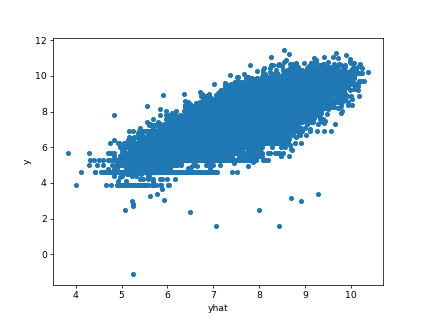

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [17]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

## Parameters

### (Relative) Income Elasticity

In [18]:
result.get_beta().sort_values()

j
Maize (flour)                                            0.043248
Tea (dry)                                                0.220237
Cassava fresh                                            0.307779
Sweet potatoes                                           0.310400
Peas, beans, lentils and other pulses                    0.358606
Rice (husked)                                            0.392811
Coconuts                                                 0.399247
Plantains                                                0.399460
Chicken                                                  0.451534
Irish potatoes                                           0.456196
Pastries                                                 0.456710
Other spices                                             0.458748
Beef                                                     0.494837
Cooking oil                                              0.497819
Dried/salted/canned fish                                 0.506372
Soft dri

<IPython.core.display.Javascript object>


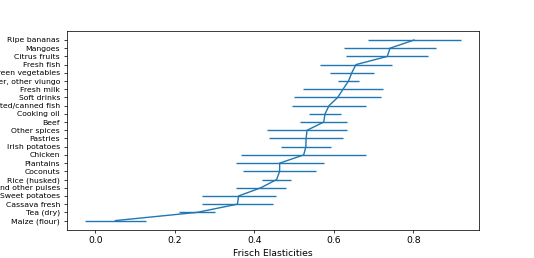

<IPython.core.display.Javascript object>


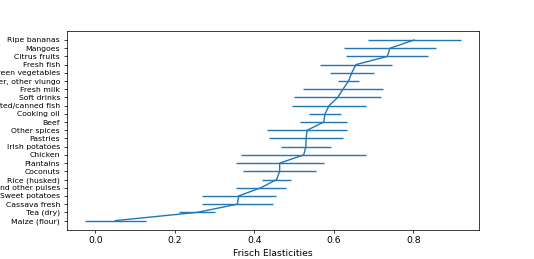

In [19]:
result.graph_beta()

### Demand and Household Composition¶

In [20]:
result.gamma

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Rural,Constant
j,,,,,,,,,,,,,,,,,
Beef,-0.063862,-0.002861,0.011562,0.047103,0.084244,0.043289,0.037242,-0.052766,0.004110,-0.031288,0.064526,0.044713,0.137218,0.137462,0.195814,-0.072126,-0.648411
Cassava fresh,0.056258,0.051787,0.137815,0.025594,0.045555,0.007514,0.151860,0.009452,0.042914,0.103588,0.083614,0.102601,0.053991,0.148623,-0.055310,-0.062819,-0.344392
Chicken,-0.110308,0.055696,0.005269,0.036107,0.043342,0.074536,0.104158,-0.017143,0.010859,-0.050174,0.062374,0.041659,0.050601,0.068649,0.209710,-0.058994,-0.668195
Citrus fruits,-0.034489,-0.071919,-0.021131,-0.003845,0.017842,0.012984,-0.026323,-0.075124,-0.073510,0.043743,-0.018551,0.036737,0.063026,-0.044784,0.430047,-0.058661,-0.806309
Coconuts,0.055978,0.059639,0.043572,0.056080,0.043483,0.024046,0.073511,0.027544,0.065276,0.077656,0.034860,0.067870,0.090414,0.078632,0.020821,-0.085713,-0.422843
Cooking oil,-0.036530,-0.000500,-0.003248,0.068910,0.115001,0.078502,-0.003886,-0.067831,-0.003824,0.024540,0.051583,0.045780,0.111114,0.063453,0.156637,-0.042062,-0.527091
Dried/salted/canned fish,0.034526,-0.021633,0.010902,-0.025729,0.093891,0.102166,-0.012585,-0.030085,-0.009362,0.023870,0.041195,0.050065,0.069221,0.044384,0.272548,-0.065786,-0.668064
Fresh fish,0.007407,-0.000934,0.000771,0.054740,0.115826,0.117949,-0.001293,-0.048606,-0.017461,-0.011229,-0.014833,0.040147,0.112371,0.075129,0.285408,-0.025489,-0.779224
Fresh milk,0.044414,-0.007313,-0.017748,0.046266,0.101342,0.008262,-0.104373,-0.044674,-0.030737,0.085174,0.049246,0.012796,0.122354,0.098361,0.137868,-0.050111,-0.552981


## (C) Counterfactual Experiments<a class="anchor" id="counterfactual"></a>
If everyone's total food expenditures doubled (holding prices fixed)
how would this affect nutrition in the population? What if relative food prices changed?
Think of other counterfactual experiments that might be interesting.

## (A) Presentation<a class="anchor" id="prensentation"></a>